In [46]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

import sys
sys.path.append('/media/beans/ssd/bespoke')

from constants import *
from imports import *
from viz_utils import *
from traj_utils import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [47]:
run_paths = glob.glob("/media/beans/ssd/blender_membank/*/run*", recursive=True)

In [48]:
run_path = random.choice(run_paths)

aux = np.concatenate([np.load(f'{run_path}/aux_{i}.npy') for i in range(115, 1160, 116)], axis=0)
targets = np.concatenate([np.load(f'{run_path}/targets_{i}.npy') for i in range(115, 1160, 116)], axis=0)

targets[:-1,:] = targets[1:,:] #TODO this should be moved further upstream, remove from here
aux[:-1,:] = aux[1:,:] # NOTE this stagger is verified correct

targets_all = targets
targets, wp_dists, wp_z = np.split(targets_all, 3, axis=1)

aux.shape, targets.shape, wp_dists.shape, wp_z.shape, run_path

((1160, 5),
 (1160, 30),
 (1160, 30),
 (1160, 30),
 '/media/beans/ssd/blender_membank/dataloader_06/run_7')

In [49]:
ix = 1100
headings = get_headings_from_traj(targets[ix], wp_dists[ix])
curvatures = get_curvatures_from_headings(headings)

In [50]:
hds = abs(headings[1:] - headings[:-1])
np.cos(hds)

array([0.9992395 , 0.999941  , 0.9999321 , 0.99988586, 0.9999606 ,
       0.9999693 , 0.9999999 , 0.99999994, 0.9997375 , 0.99997425,
       0.99986637, 0.9999961 , 0.9998237 , 0.9999954 , 0.99994564,
       0.99986655, 0.9997316 , 0.99997866, 0.9999928 , 0.9947273 ,
       0.980456  , 0.97692835, 0.9813106 , 0.98946977, 0.9953657 ,
       0.9981442 , 0.999538  , 0.999944  , 0.99999326], dtype=float32)

In [51]:
hds

array([0.03900252, 0.01086193, 0.01165127, 0.01510922, 0.0088765 ,
       0.00783779, 0.00051683, 0.00035583, 0.02291268, 0.00717608,
       0.01634808, 0.00279308, 0.01877756, 0.00302237, 0.01042916,
       0.01633905, 0.02316849, 0.00653458, 0.0037981 , 0.10273562,
       0.19803035, 0.21522492, 0.19363844, 0.14525008, 0.09631097,
       0.0609318 , 0.0303992 , 0.0105859 , 0.00367665], dtype=float32)

In [53]:
SEGMENT_DISTS * np.cos(hds)

array([0.9992395 , 0.99994099, 0.99993211, 0.99988586, 0.9999606 ,
       0.9999693 , 0.99999988, 0.99999994, 0.9997375 , 0.99997425,
       0.99986637, 0.99999613, 0.99982369, 0.99999541, 0.99994564,
       0.99986655, 0.9997316 , 0.99997866, 0.99999279, 9.94727314,
       9.80455995, 9.76928353, 9.81310606, 9.89469767, 9.95365679,
       9.98144209, 9.99538004, 9.99943972, 9.99993265])

In [60]:
np.degrees(.2)

11.459155902616466

In [61]:
np.cos(.2)

0.9800665778412416

In [62]:
wp_dists[ix]

array([  5.9726496,   6.9658165,   7.961539 ,   8.951186 ,   9.933262 ,
        10.92093  ,  11.91357  ,  12.902941 ,  13.8905115,  14.871224 ,
        15.85002  ,  16.830822 ,  17.812317 ,  18.794916 ,  19.775692 ,
        20.749609 ,  21.722643 ,  22.694508 ,  23.669004 ,  24.64528  ,
        34.187756 ,  43.371243 ,  52.082294 ,  60.36711  ,  68.41832  ,
        76.446014 ,  84.59853  ,  92.97434  , 101.61722  , 110.509636 ],
      dtype=float32)

In [63]:
(np.cos(hds) * SEGMENT_DISTS).sum() + 6, wp_dists[ix][-1]

(124.15660840272903, 110.509636)

In [64]:
(np.cos(hds) * SEGMENT_DISTS)[:24]

array([0.9992395 , 0.99994099, 0.99993211, 0.99988586, 0.9999606 ,
       0.9999693 , 0.99999988, 0.99999994, 0.9997375 , 0.99997425,
       0.99986637, 0.99999613, 0.99982369, 0.99999541, 0.99994564,
       0.99986655, 0.9997316 , 0.99997866, 0.99999279, 9.94727314,
       9.80455995, 9.76928353, 9.81310606, 9.89469767])

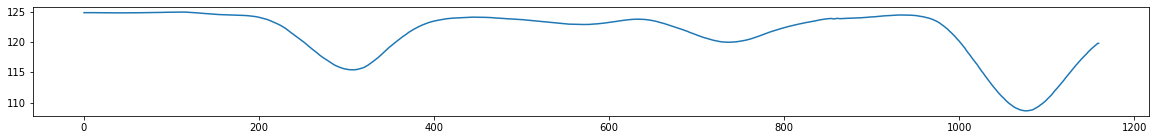

In [65]:
plt.figure(figsize=(20,2))
plt.plot(wp_dists[:, -1])

In [66]:
targets_all.shape, targets.shape

((1160, 90), (1160, 30))

In [67]:
speeds = aux[:,2]
wp_angles = gather_preds(targets, speeds)

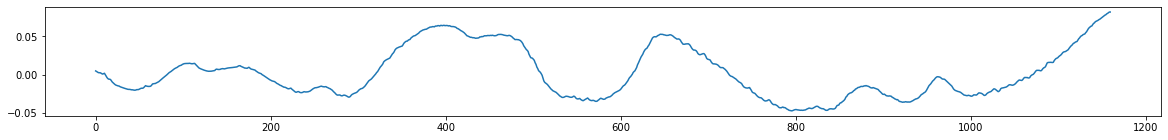

In [68]:
# steer
plt.figure(figsize=(20,2))
plt.plot(wp_angles)

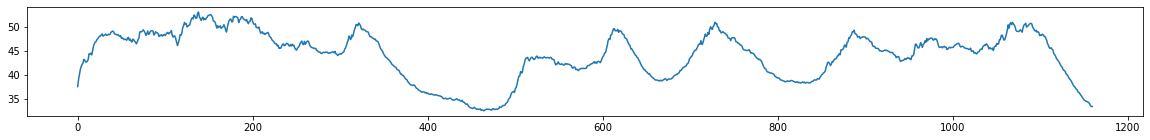

In [69]:
plt.figure(figsize=(20,2))
plt.plot(speeds)

In [70]:
ccs = []
for i in range(len(targets)):
    h = get_headings_from_traj(targets[i], wp_dists[i])
    s = kph_to_mps(speeds[i])
    ccs.append(get_curve_constrained_speed(h, s))

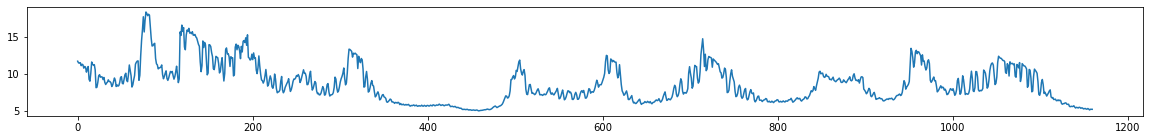

In [71]:
# curve constrained speeds
plt.figure(figsize=(20,2))
plt.plot(ccs)

In [72]:
speeds.max()

53.07822

<BarContainer object of 10 artists>

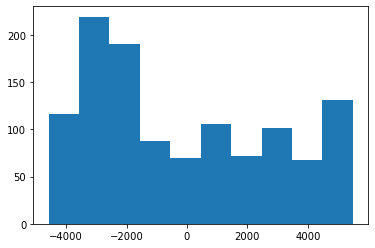

In [73]:
# Torque
torque = np.degrees(wp_angles) * speeds**2
plt.hist(torque)[2]

<BarContainer object of 10 artists>

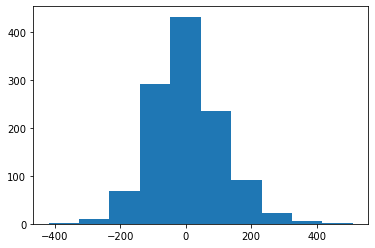

In [74]:
plt.hist(torque[1:]-torque[:-1])[2]

In [75]:
img_paths = sorted(glob.glob(f"{run_path}/imgs/*"))

In [76]:
height, width, channels = cv2.imread(img_paths[0]).shape #processed_imgs[0].shape
w2 = width//2
h2 = height//2

fps = 20

video = cv2.VideoWriter(f'/home/beans/bespoke_vids/sim/for_model_5.17.avi', cv2.VideoWriter_fourcc(*"MJPG"), fps, (width,height))

for i in range(len(img_paths)-1):

    img = cv2.imread(img_paths[i])
    
    # wps
    img = draw_wps(img, targets[i])
     
    # Guidelines
    img[:,w2-1:w2+1,:] -= 20 # darker line vertical center
    img[h2-1:h2+1:,:,:] -= 20 # darker line horizontal center
    
    video.write(img)
    
video.release()

In [77]:
from viz_utils import make_vid

imgs = np.stack([cv2.imread(f)[:,:,::-1] for f in img_paths]).astype(np.uint8)
imgs.shape, aux.shape

run_id = "sim"
model_stem = "7.7_avg"
make_vid(run_id, model_stem, imgs, aux, targets=targets)

(1160, 30) (1160, 1, 13, 80) (1160, 1, 13, 80)
Made vid!


In [79]:
paths = glob.glob(f"{BLENDER_MEMBANK_ROOT}/**/obs_per_sec.npy", recursive=True)
obs_per_sec = np.array([np.load(p)[0] for p in paths])
obs_per_sec

array([11.842471  , 13.445037  , 10.276657  ,  9.63339   , 10.2454    ,
       10.231232  ,  9.767325  , 11.163058  ,  0.15492584,  8.965064  ,
       13.216338  ,  8.414433  ], dtype=float32)

In [80]:
all_aux = []
all_wp_angles = []
all_wp_dists = []
n_couldnt_load_runs = 0
for d in range(N_RUNNERS):
    datagen_id = ("00"+str(d))[-2:]
    for r in range(RUNS_TO_STORE_PER_PROCESS):
        run_path = f"/media/beans/ssd/blender_membank/dataloader_{datagen_id}/run_{r}"
        n_targets_paths_files = len(glob.glob(f"{run_path}/targets_*.npy"))
        targets_paths = [f'{run_path}/targets_{i}.npy' for i in range(115, 1160, 116)]
        
        if n_targets_paths_files < len(targets_paths):
            n_couldnt_load_runs += 1
            continue
            
        aux = np.concatenate([np.load(f'{run_path}/aux_{i}.npy') for i in range(115, 1160, 116)], axis=0)
        targets = np.concatenate([np.load(p) for p in targets_paths], axis=0)
        
        wp_angles, wp_dists, wp_zs = np.split(targets, 3, axis=1)
        
        all_aux.append(aux)
        all_wp_angles.append(wp_angles)
        all_wp_dists.append(wp_dists)
        
all_aux = np.stack(all_aux, axis=0)
all_wp_angles = np.stack(all_wp_angles, axis=0)
all_wp_dists = np.stack(all_wp_dists, axis=0)

print(f"couldn't load {n_couldnt_load_runs} out of {N_RUNNERS*RUNS_TO_STORE_PER_PROCESS} runs")

couldn't load 0 out of 360 runs


In [92]:
%%time
all_headings = get_headings_from_traj_batch(all_wp_angles, all_wp_dists)

CPU times: user 5.12 s, sys: 19.9 ms, total: 5.14 s
Wall time: 5.12 s


In [93]:
all_wp_angles.shape, all_wp_dists.shape, all_headings.shape

((360, 1160, 30), (360, 1160, 30), (360, 1160, 30))

In [94]:
all_torques = []
all_tds = []
for i in range(len(all_aux)):
    speeds = all_aux[i, :, 2]
    wp_angles = gather_preds(all_wp_angles[i, :, :], speeds)
    torque = np.degrees(wp_angles) * speeds**2
    all_torques.append(torque)
    all_tds.append(torque[1:]-torque[:-1])
    
all_torques = np.concatenate(all_torques)
all_tds = np.concatenate(all_tds)

<BarContainer object of 40 artists>

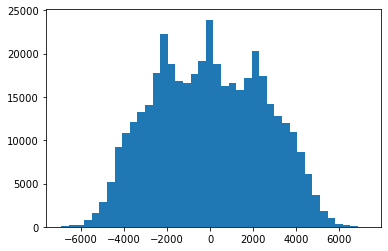

In [95]:
plt.hist(all_torques.flatten(), bins=40)[2]

<BarContainer object of 40 artists>

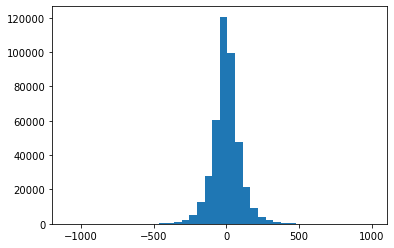

In [96]:
plt.hist(all_tds.flatten(), bins=40)[2]

In [97]:
np.quantile(abs(all_tds.flatten()), .999), np.quantile(abs(all_torques.flatten()), .999)

(463.2444481524403, 6267.0884958267925)

In [98]:
mean_dists = abs(all_wp_dists).mean(axis=0).mean(0)
mean_dists

array([  5.995638,   6.994637,   7.993602,   8.99253 ,   9.991377,
        10.990188,  11.988926,  12.98757 ,  13.986117,  14.98455 ,
        15.982848,  16.980965,  17.978952,  18.976866,  19.974594,
        20.97217 ,  21.969555,  22.966846,  23.963943,  24.960863,
        34.92002 ,  44.8577  ,  54.770874,  64.65863 ,  74.51911 ,
        84.34995 ,  94.150696, 103.92116 , 113.66215 , 123.374176],
      dtype=float32)

<BarContainer object of 40 artists>

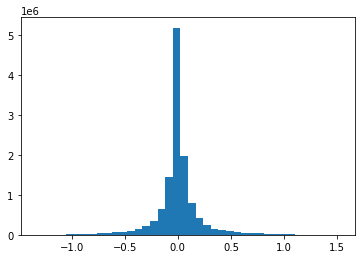

In [99]:
plt.hist(all_headings.flatten(), bins=40)[2]

In [100]:
mean_headings = abs(all_headings).mean(axis=0).mean(0)
mean_headings

array([0.02557581, 0.0294817 , 0.03332545, 0.03716544, 0.04098274,
       0.04476761, 0.04851102, 0.05216971, 0.05571661, 0.05918089,
       0.06260481, 0.06598821, 0.06935564, 0.07273806, 0.07616173,
       0.07963772, 0.08310309, 0.08651136, 0.08987916, 0.09319666,
       0.12488357, 0.15464026, 0.1819298 , 0.20662913, 0.22869396,
       0.24870318, 0.26659095, 0.28248549, 0.2963673 , 0.3033509 ],
      dtype=float32)

In [102]:
mean_headings[-1] / mean_headings[0]

11.860853

In [103]:
mean_angles = abs(all_wp_angles).mean(axis=0).mean(0)
mean_angles

array([0.01501583, 0.01664189, 0.01839747, 0.02021174, 0.02205646,
       0.02391624, 0.02578221, 0.02764774, 0.02950348, 0.0313437 ,
       0.03316661, 0.03497342, 0.03676248, 0.03853535, 0.04029406,
       0.04204177, 0.04378234, 0.04551685, 0.04724532, 0.04896694,
       0.06583856, 0.08189007, 0.09692572, 0.11099698, 0.12404112,
       0.13605092, 0.14708899, 0.15721036, 0.16646256, 0.1748872 ],
      dtype=float32)

In [104]:
mean_angles[-1] / mean_angles[0]

11.646854

In [106]:
mean_angles[0] / .015

1.0010553523898125

<BarContainer object of 40 artists>

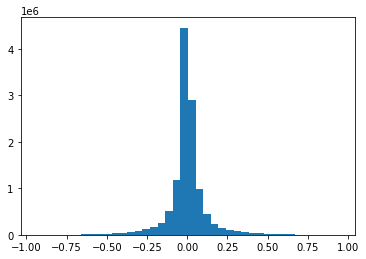

In [259]:
plt.hist(all_wp_angles.flatten(), bins=40)[2]

<BarContainer object of 40 artists>

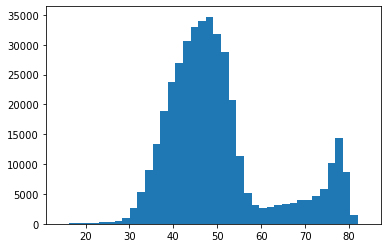

In [260]:
plt.hist(all_aux[:,:,2].flatten(), bins=40)[2]